#### Exercise 1.4 (Page 8)

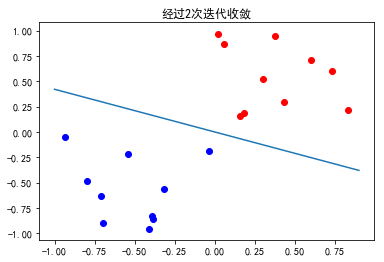

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 11 21:32:17 2019

@author: qinzhen
"""

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#设置随机种子，保证每次结果一致
seed = 42
rnd = np.random.RandomState(42)

#首先生成20个可分的数据，为方便起见，分别生成10个第一象限的点和10个第三象限的点
#第一象限10个点
X1 = rnd.uniform(0, 1, size=(10, 2))
y1 = np.ones(10)
#第三象限10个点
X2 = rnd.uniform(-1, 0, size=(10, 2))
y2 = -1 * np.ones(10)

#按行拼接
X = np.r_[X1, X2]
y = np.r_[y1, y2]
#添加第一个分量为1
X = np.c_[np.ones((20, 1)), X]

#定义判别函数，判断所有数据是否分类完成
def Judge(X, y, w):
    flag = 1
    n = X.shape[0]
    for i in range(n):
        if X[i, :].dot(w) * y[i] <= 0:
            flag = 0
            break
    return flag

#记录次数
s = 0
#初始化w=[0, 0, 0]
w = np.array([0,0,0], dtype=float)
#数据数量
n = X.shape[0]
while (Judge(X, y ,w) == 0):
    for i in range(n):
        if X[i, :].dot(w) * y[i] <= 0:
            w += y[i] * X[i, :]
            s += 1
            
#直线方程为w0+w1*a+w2*b=0,根据此生成点
a = np.arange(-1, 1, 0.1)
b = np.array([(i * w[1] + w[0]) / (-w[2]) for i in a])

#画出图片
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.scatter(X2[:, 0], X2[:, 1], c='b')
plt.plot(a, b)
plt.title(u"经过"+str(s)+u"次迭代收敛")
plt.show()

#### Exercise 1.10 (Page 23)
(b)

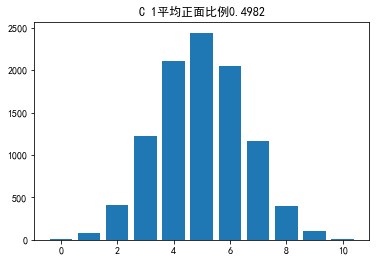

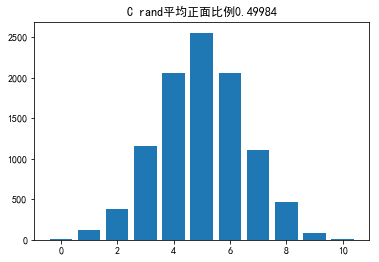

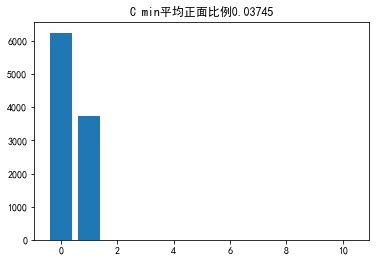

0.03764441914136553


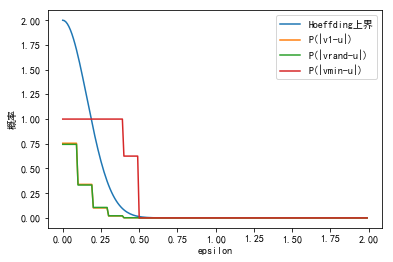

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 11 23:05:49 2019

@author: qinzhen
"""

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#首先模拟一次实验的结果，n表示硬币数量，1表示正面，0表示反面，最后返回的结果为正面的数量
def simu(n):
    #n个硬币，每个硬币投10次
    X = np.random.randint(0, 2, (n, 10))
    #计算每个硬币正面的数量
    X1 = np.sum(X, axis=1)
    #第一个元素
    y1 = X1[0]
    #随机元素
    y2 = X1[np.random.randint(0, n)]
    #最小值
    y3 = np.min(X1)
    return y1, y2, y3

#记录正面硬币得分的具体情况，存入一个长度为11的列表，第i个元素表示得分为i的次数
Y1 = [0]*11
Y2 = [0]*11
Y3 = [0]*11
#硬币数量
n = 1000
#实验次数
m = 10000
for i in range(m):
    y1, y2, y3 = simu(n)
    Y1[y1] += 1
    Y2[y2] += 1
    Y3[y3] += 1
    

#计算正面的次数
def total(x):
    s = 0
    for i in range(len(x)):
        s += i*x[i]
    return s
#投硬币的总次数
t = m * 10

####(b)
#作图
plt.bar(range(11),Y1)
plt.title(u'C 1平均正面比例'+str(total(Y1) / t))
plt.show()

plt.bar(range(11),Y2)
plt.title(u'C rand平均正面比例'+str(total(Y2) / t))
plt.show()

plt.bar(range(11),Y3)
plt.title(u'C min平均正面比例'+str(total(Y3) / t))
plt.show()

#数值计算结果
from scipy.special import comb

#P(v<=k),n表示一共几个硬币
def f(k, n):
    s = 0
    for i in range(k+1, 11):
        s += comb(10,i) / (2**10)
    return 1- s ** n

#P(v=k)
def g(k, n):
    return f(k, n) - f(k-1, n)

def h(n):
    s = 0
    for k in range(11):
        s += k / 10.0 * g(k, n)
    return s

print(h(1000))
#0.03764441914136553

####(c)
epsilon = np.arange(0, 2, 0.01)
size = epsilon.shape[0]

Z1 = np.zeros(size)
Z2 = np.zeros(size)
Z3 = np.zeros(size)

#计算P(|u-v|>epsilon)
for i in range(size):
    for j in range(11):
        if abs((j - 5) / 10.0) > epsilon[i]:
            Z1[i] += Y1[j]
            Z2[i] += Y2[j]
            Z3[i] += Y3[j]
Z1 = Z1 / m
Z2 = Z2 / m
Z3 = Z3 / m

#Hoeffding上界值
Z = np.array([2 * np.exp(-2*(i**2)*10) for i in epsilon])

#作图
plt.plot(epsilon, Z, label=u"Hoeffding上界")
plt.plot(epsilon, Z1, label=u"P(|v1-u|)")
plt.plot(epsilon, Z2, label=u"P(|vrand-u|)")
plt.plot(epsilon, Z3, label=u"P(|vmin-u|)")
plt.xlabel(u'epsilon')
plt.ylabel(u'概率')
plt.legend()
plt.show()